**Practica matriz de confusión y metricas**



Ejemplo  - Calificación de examenes 
<br>(0) Reprueba     40% reprueba
<br>(1) Aprueba      60% aprueba

1.Cargamos liberias 

In [316]:
import matplotlib.pyplot as plt #Libreria grafica
import pandas as pd #construir matriz
from  sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score
from  sklearn.metrics import precision_score
from  sklearn.metrics import recall_score
from  sklearn.metrics import f1_score

In [317]:
def metricas(datos_reales, datos_predecidos):
    matriz = confusion_matrix(datos_reales, datos_predecidos)
    accuracy = accuracy_score(datos_reales, datos_predecidos)
    precision = precision_score(datos_reales, datos_predecidos)
    recall = recall_score(datos_reales, datos_predecidos)
    f1 = f1_score(datos_reales, datos_predecidos)
    return matriz, accuracy, precision, recall, f1
    

In [318]:
def visualizar_metricas(datos_reales, datos_predecidos, titulo):

    matriz, accuracy, precision, recall, f1 = metricas(datos_reales, datos_predecidos)

    #Estructura
    plt.figure(figsize=(4,4))
    matriz = pd.DataFrame(matriz, columns=["0:Reprueba", "1:Aprueba"])
    plt.matshow(matriz, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Predecidas")
    plt.xlabel("Reales")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas= (("Verdaderos\nnegativos", "Falsos\npositivos"), ("Falsos\nnegativos", "Verdaderos\npositivos"))

    #Datos
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j+0.14, str(matriz.iloc[i,j]), fontsize=30, ha="center", va="center")
            plt.text(i, j-0.25, etiquetas[i][j], fontsize=11.5, ha="center", va="center")
            

    #labels informativos
    plt.text(1.6,-0.30, titulo, fontsize=25, c="red")
    plt.text(1.6,0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(1.6,0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(1.6,0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(1.6,1.00, "F1 Score: %0.2f" % f1, fontsize=20)


    plt.text(-1,2.0, "Leyenda", fontsize=25, c="red")
    plt.text(-1,2.20, "Accuracy/Exactitud: (VP+VN)/(VP+FP+FN+VN)", fontsize=15)
    plt.text(-1,2.40, "Precision/Precisión: VP/(VP+FP)", fontsize=15)
    plt.text(-1,2.60, "Recall/Sensibilidad: VP/(VP+FN)", fontsize=15)
    plt.text(-1,2.80, "Especificity/Especificidad : VN/(VN+FP)", fontsize=15)
    plt.text(-1,3.00, "F1 Score: (2*Precision*Recall)/Precision+Recall", fontsize=15)

    plt.show()


In [319]:
datos_reales=[0,0,0,0,1,1,1,1,1,1]

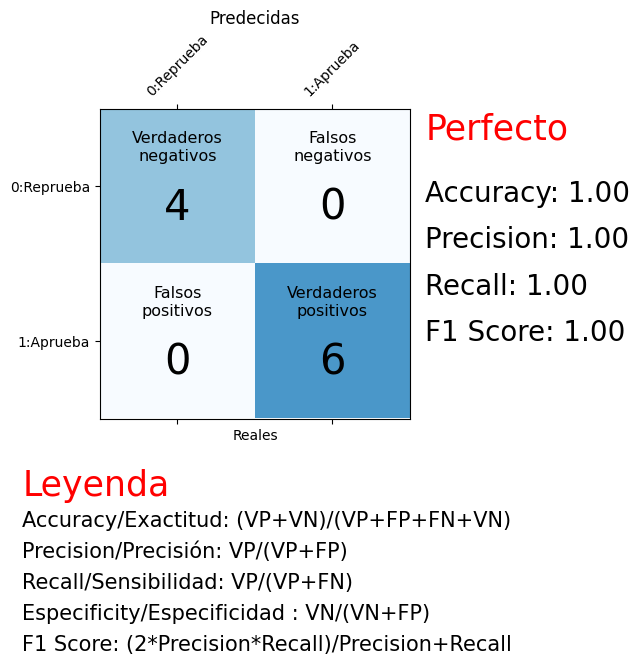

In [320]:
datos_predecidos=[0,0,0,0,1,1,1,1,1,1]
visualizar_metricas(datos_reales, datos_predecidos, "Perfecto")

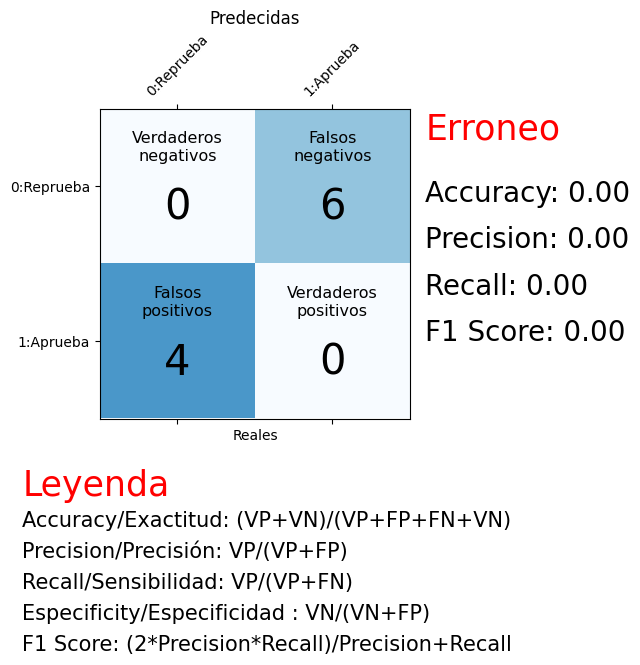

In [321]:
datos_predecidos=[1,1,1,1,0,0,0,0,0,0]
visualizar_metricas(datos_reales, datos_predecidos, "Erroneo")

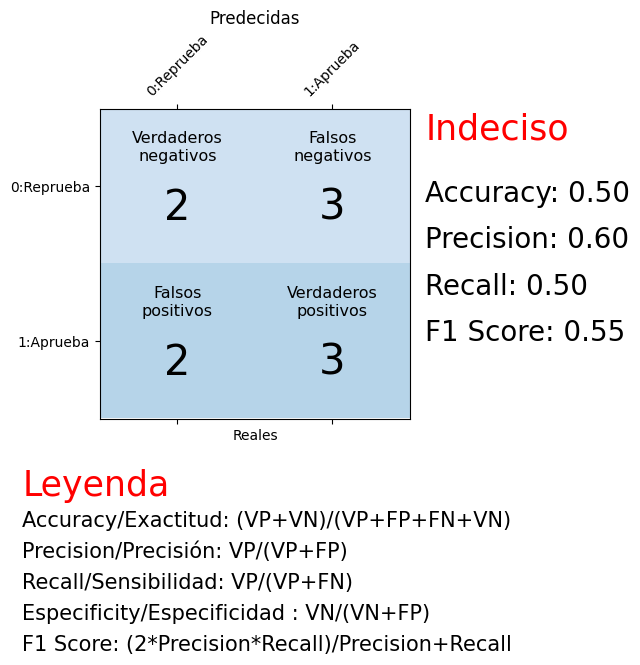

In [322]:
datos_predecidos=[1,1,0,0,0,0,0,1,1,1]
visualizar_metricas(datos_reales, datos_predecidos, "Indeciso")